# Importing the libraries

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from math import sqrt

Using TensorFlow backend.


# Loading the dataset

In [0]:
df = pd.read_csv("drive/My Drive/poster/sp1/normalized_energy_efficiency_dataset.csv")

In [0]:
df

,Unnamed: 0,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0,0.98,0.000000,0.285714,0.000000,7.0,2,0.0,0,15.55,21.33
1,1,0.98,0.000000,0.285714,0.000000,7.0,3,0.0,0,15.55,21.33
2,2,0.98,0.000000,0.285714,0.000000,7.0,4,0.0,0,15.55,21.33
3,3,0.98,0.000000,0.285714,0.000000,7.0,5,0.0,0,15.55,21.33
4,4,0.90,0.166667,0.428571,0.111111,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...,...
763,763,0.64,0.916667,0.571429,1.000000,3.5,5,0.4,5,17.88,21.40
764,764,0.62,1.000000,0.714286,1.000000,3.5,2,0.4,5,16.54,16.88
765,765,0.62,1.000000,0.714286,1.000000,3.5,3,0.4,5,16.44,17.11
766,766,0.62,1.000000,0.714286,1.000000,3.5,4,0.4,5,16.48,16.61


# Creating the Ensemble for heating load

In [0]:
'''
Aqui cargamos las variables vamos a utilizar las 7 variables como variables 
de entrenamiento y una unica variable (heating load) como la que queremos predecir
'''
X = df.iloc[:, 0:8].values
y = df.iloc[:, 8:9].values

In [0]:
'''
Partimos el dataset en training y testing con una proporción de 
20% para testing y 80% para training
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
# Verificamos el shape para ver si tenemos la cantidad correcta de variables para entrenar
X.shape

(768, 8)

In [0]:
# Training classifiers
reg1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(X_train, y_train.ravel())

In [0]:
# Predicting the Test set results
y_pred = ereg.predict(X_test)
y_pred

array([2.97531464, 1.93599012, 1.93664486, 1.19595591, 1.52960273,
       1.92341983, 2.20617672, 2.17340515, 2.94644707, 3.63972169,
       1.189908  , 1.51200067, 4.28509202, 2.16911736, 4.75566369,
       3.64211299, 2.8481524 , 1.0426987 , 3.701575  , 2.18999697,
       2.93977962, 2.15179488, 2.85292603, 2.19334829, 1.19260459,
       2.16735725, 3.72833642, 4.75819137, 1.0509812 , 4.42053376,
       4.28704432, 2.93549183, 2.981182  , 2.18588972, 2.85737004,
       2.91636718, 2.98211847, 4.39395055, 1.60649441, 1.19234614,
       2.84881878, 2.19016587, 1.50882989, 2.94087336, 1.20471204,
       2.86910579, 4.28601685, 2.9365972 , 3.62380007, 3.9291898 ,
       2.15020367, 1.96447193, 3.60566826, 4.75297875, 3.65034714,
       1.05367778, 1.21086138, 1.47241243, 3.67215673, 3.92093114,
       2.97372343, 2.19158817, 2.99401043, 4.29030464, 1.47113815,
       2.94388686, 2.18857467, 4.29097102, 4.29763847, 2.93817677,
       2.83052618, 3.63208257, 4.29365596, 2.1636111 , 3.62815

In [0]:
'''
 Creamos un dataframe que contenga los resultados reales del testing y los 
 resultados de la prediccion que realizamos esto es para luego poder calcular
 el mse, rmse, mae
'''
df_heat = pd.DataFrame()

In [0]:
df_heat['original_values'] = y_test.flatten()
df_heat['Predicted_Values'] = y_pred

In [0]:
df_heat

,original_values,Predicted_Values
0,3,2.975315
1,2,1.935990
2,2,1.936645
3,0,1.195956
4,1,1.529603
...,...,...
149,4,3.673015
150,5,4.433362
151,4,3.629567
152,5,3.628280


In [0]:
'''
Todos los calculos que se van a realizar posteriormente 
nos ayudaran a poder ver el performance del modelo
'''

# Calculamos el Mean squared Error
mse_heat = mean_squared_error(df_heat['original_values'], df_heat['Predicted_Values'])
mse_heat

0.23509119186503136

In [0]:
# Calculamos el Mean Absolute Error
mae_heat = mean_absolute_error(df_heat['original_values'], df_heat['Predicted_Values'])
mae_heat

0.3536439578951829

In [0]:
# Calculamos el Root Mean Squared Error 
root_mean_squared_error = sqrt(mse_heat)
root_mean_squared_error

0.48486203384574394

Text(0, 0.5, 'Heating Load')

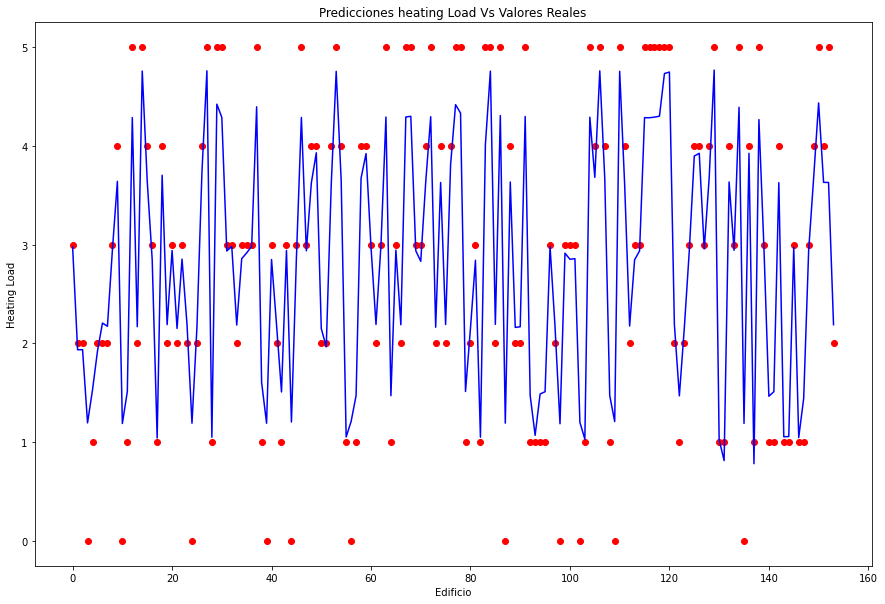

In [0]:
'''
Esta grafica nos ayudara a poder visualizar los resultado de nuestro 
modelo, tenemos dos graficas una que tiene una linea (azul) que esta 
representa los valores predichos esta nos ayuda a poder ver las predicciones
y ver como es su comportamiento.

En la segunda grafica podemos observar las predicciones pero ahora en un 
scatterplot y esto nos ayudara a confirmar si estamos haciendo 
overfitting y si que tanto se alinean nuestras predicciones 
con el valor real.
'''
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test.size), y_test, color = 'red')
ax.plot(np.arange(0, y_test.size), y_pred, color = 'blue')
plt.title('Predicciones heating Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Heating Load')

Text(0, 0.5, 'Heating Load')

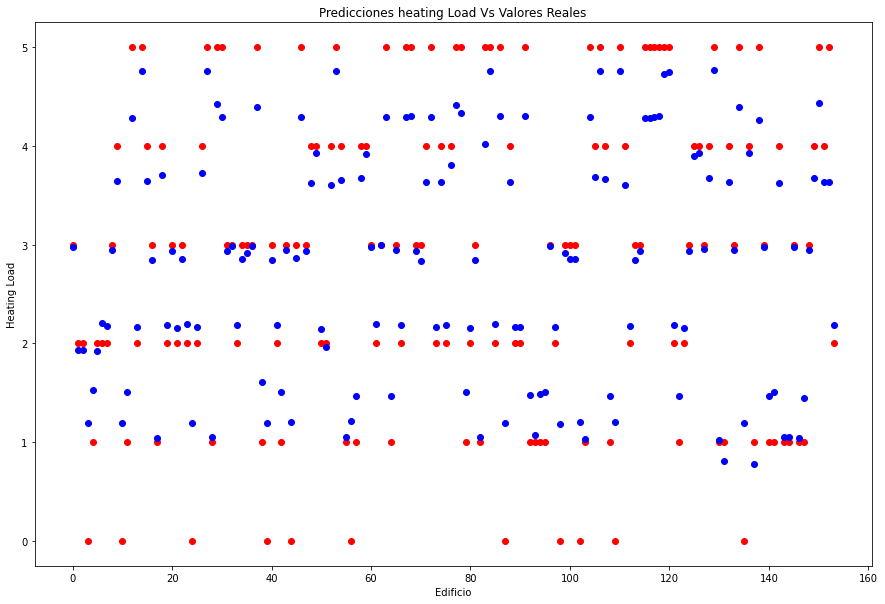

In [0]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test.size), y_test, color = 'red')
ax.scatter(np.arange(0, y_test.size), y_pred, color = 'blue')
plt.title('Predicciones heating Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Heating Load')

# Creating the Ensemble for cooling load

In [0]:
'''
Aqui cargamos las variables vamos a utilizar las 7 variables como variables 
de entrenamiento y una unica variable (cooling load) como la que queremos predecir
'''
X_cooling= df.iloc[:, 0:8].values
y_cooling = df.iloc[:, 9:10].values

In [0]:
'''
Partimos el dataset en training y testing con una proporción de 
20% para testing y 80% para training
'''
X_train_cooling, X_test_cooling, y_train_cooling, y_test_cooling = train_test_split(X_cooling, y_cooling, test_size = 0.2, random_state = 0)

In [0]:
# Verificamos el shape para ver si tenemos la cantidad correcta de variables para entrenar
X_cooling.shape

(768, 8)

In [0]:
# Training classifiers
reg1_cooling = GradientBoostingRegressor(random_state=1, n_estimators=10)
reg2_cooling = RandomForestRegressor(random_state=1, n_estimators=10)
reg3_cooling = LinearRegression()
ereg_cooling = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg_cooling = ereg_cooling.fit(X_train_cooling, y_train_cooling.ravel())

In [0]:
# Predicting the Test set results
y_pred_cooling = ereg_cooling.predict(X_test_cooling)
y_pred_cooling

array([16.54971338, 11.29636367, 32.05315862, 22.02922811, 30.73796158,
       27.20189599, 28.00677909, 30.41280067, 28.3964912 , 25.35772444,
        8.89712241, 37.08486984, 12.5484915 , 36.94782235, 36.77998762,
       25.69459746, 11.76123569, 27.31761868, 16.03865106, 13.65052209,
       13.95322214, 30.81590556, 11.78792796, 34.66753254,  8.35358583,
       15.70496641, 13.94686184, 15.00620363, 11.80299145, 34.62836446,
       14.21451653, 14.45715019, 36.99344153, 14.49920621, 28.00906494,
       35.27872519, 15.09631568, 35.74485438, 18.3859902 , 11.72081385,
       12.71861208, 34.83018213, 15.93576144, 27.77193444, 22.17746861,
       24.87421869, 11.66445697, 13.83920507, 27.00812581, 30.65321978,
       30.73456369, 14.05531576, 32.27494484, 16.40260987, 35.2140025 ,
       11.18272405, 21.26868341, 28.39671315, 34.49239488, 15.80526857,
       16.48037151, 13.65686396, 30.63117434, 11.1301956 , 13.67195157,
       13.12887136, 34.73950693, 12.08257199, 26.20182893, 34.70

In [0]:
'''
 Creamos un dataframe que contenga los resultados reales del testing y los 
 resultados de la prediccion que realizamos esto es para luego poder calcular
 el mse, rmse, mae
'''
df_cooling = pd.DataFrame()

In [0]:
df_cooling['original_values'] = y_test_cooling.flatten()
df_cooling['Predicted_Values'] = y_pred_cooling

In [0]:
df_cooling

,original_values,Predicted_Values
0,15.18,16.549713
1,10.32,11.296364
2,37.26,32.053159
3,16.95,22.029228
4,32.26,30.737962
...,...,...
149,14.33,16.012677
150,28.15,27.827278
151,11.33,12.617881
152,13.86,16.345078


In [0]:
'''
Todos los calculos que se van a realizar posteriormente 
nos ayudaran a poder ver el performance del modelo
'''

# Calculamos el Mean squared Error
mse_cooling = mean_squared_error(df_cooling['original_values'], df_cooling['Predicted_Values'])
mse_cooling

5.243731858892376

In [0]:
# Calculamos el Mean Absolute Error
mae_cooling = mean_absolute_error(df_cooling['original_values'], df_cooling['Predicted_Values'])
mae_cooling

1.8070042875697025

In [0]:
# Calculamos el Root Mean Squared Error 
root_mean_squared_error = sqrt(mse_cooling)
root_mean_squared_error

2.2899196184347557

Text(0, 0.5, 'Cooling Load')

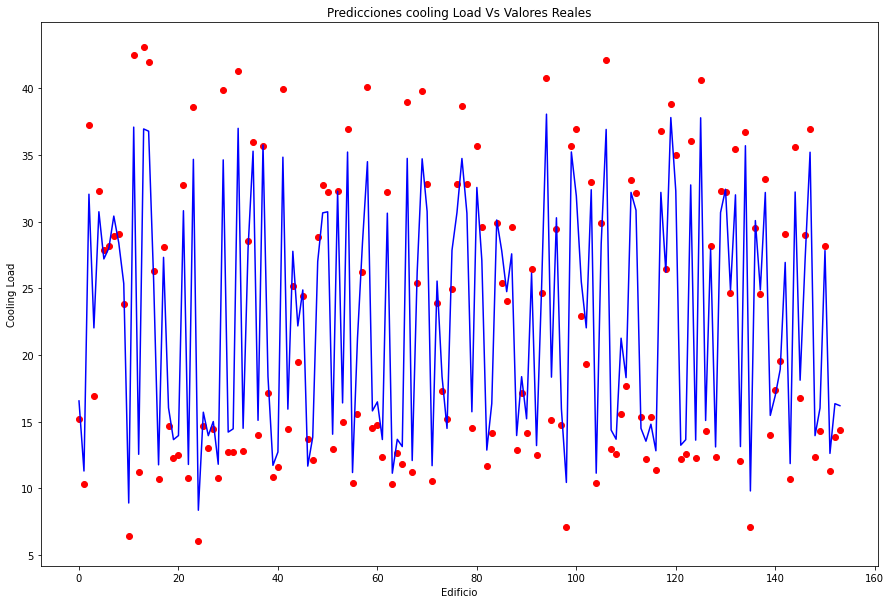

In [0]:
'''
Esta grafica nos ayudara a poder visualizar los resultado de nuestro 
modelo, tenemos dos graficas una que tiene una linea (azul) que esta 
representa los valores predichos esta nos ayuda a poder ver las predicciones
y ver como es su comportamiento.

En la segunda grafica podemos observar las predicciones pero ahora en un 
scatterplot y esto nos ayudara a confirmar si estamos haciendo 
overfitting y si que tanto se alinean nuestras predicciones 
con el valor real.
'''
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test_cooling.size), y_test_cooling, color = 'red')
ax.plot(np.arange(0, y_test_cooling.size), y_pred_cooling, color = 'blue')
plt.title('Predicciones cooling Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Cooling Load')

Text(0, 0.5, 'Cooling Load')

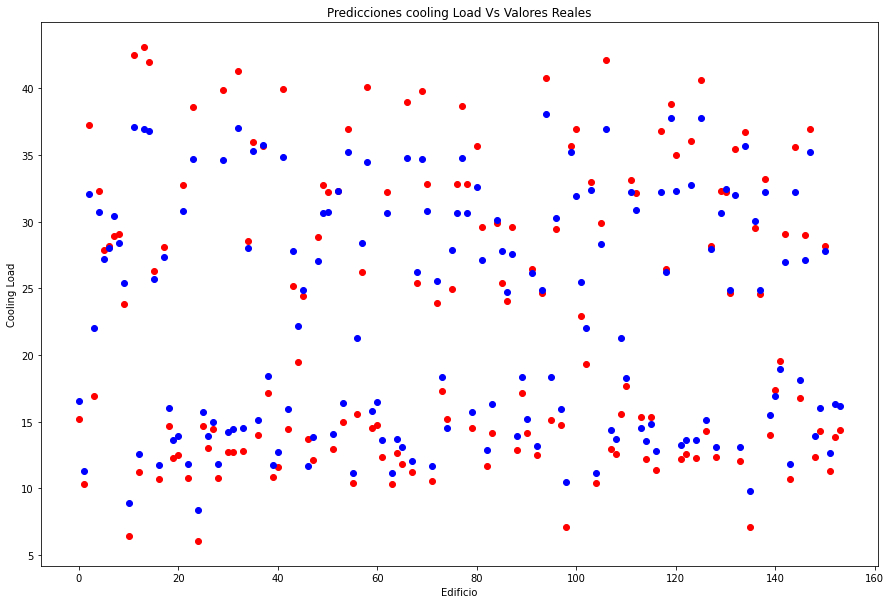

In [0]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test_cooling.size), y_test_cooling, color = 'red')
ax.scatter(np.arange(0, y_test_cooling.size), y_pred_cooling, color = 'blue')
plt.title('Predicciones cooling Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Cooling Load')